# **Azhar Rizki Zulma**
## **Submission 1 - NLP**
Dataset: https://www.kaggle.com/lokkagle/movie-genre-data

### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Upload Dataset**

In [2]:
uploaded = files.upload()

Saving kaggle_movie_train.csv to kaggle_movie_train.csv


### **Read Dataset**

In [3]:
df = pd.read_csv('kaggle_movie_train.csv')
print(f'Jumlah datasets: {len(df)}')
df.head()

Jumlah datasets: 22579


,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


### **Check Dataset Info & Nullable Value**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


### **Count Genre Dataset value**

In [5]:
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

### **Data Splitting**
Memisahkan Dataset baru yang berisi genre dan sinopsis

In [6]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(['id', 'genre'], axis=1)
df_baru

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,0,0,0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,0,1,0,0,0,0,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,0,1,0,0,0,0,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,0,0,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,0,1,0,0,0,0,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,0,1,0,0,0,0,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,0,0,0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0,0,0,0,0,0


In [7]:
text = df_baru['text'].values
label = df_baru[['action', 'comedy',	'sci-fi', 'horror', 'drama', 'thriller', 'other', 'adventure', 'romance']].values

Memisahkan data train dan data test

In [8]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42, shuffle = True)

### **Tokenizing, Sequencing, dan Padding**

In [9]:
tokenizer = Tokenizer(num_words=15000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

### **Permodelan Menggunakan Squential Model**

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=64),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          960000    
                                                                 
 lstm (LSTM)                 (None, None, 128)         98816     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

### **Callback**

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [12]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)

### **Training**

In [13]:
history = model.fit(padded_train, label_train, epochs=50,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
565/565 - 41s - loss: 1.5654 - accuracy: 0.3755 - val_loss: 1.5152 - val_accuracy: 0.3826 - 41s/epoch - 73ms/step
Epoch 2/50
565/565 - 34s - loss: 1.0762 - accuracy: 0.5896 - val_loss: 0.6889 - val_accuracy: 0.7783 - 34s/epoch - 61ms/step
Epoch 3/50
565/565 - 34s - loss: 0.4721 - accuracy: 0.8481 - val_loss: 0.4623 - val_accuracy: 0.8485 - 34s/epoch - 60ms/step
Epoch 4/50
565/565 - 34s - loss: 0.2442 - accuracy: 0.9171 - val_loss: 0.4602 - val_accuracy: 0.8640 - 34s/epoch - 60ms/step
Epoch 5/50
565/565 - 34s - loss: 0.1401 - accuracy: 0.9552 - val_loss: 0.4748 - val_accuracy: 0.8849 - 34s/epoch - 60ms/step
Epoch 6/50
565/565 - 34s - loss: 0.0927 - accuracy: 0.9674 - val_loss: 0.4961 - val_accuracy: 0.8895 - 34s/epoch - 60ms/step
Epoch 7/50
565/565 - 34s - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.5503 - val_accuracy: 0.8913 - 34s/epoch - 60ms/step
Epoch 8/50
565/565 - 34s - loss: 0.0513 - accuracy: 0.9851 - val_loss: 0.5586 - val_accuracy: 0.8924 - 34s/epoch - 60ms/step


### **Evaluasi Model**

In [14]:
model.evaluate(padded_test, label_test)

142/142 [==============================] - 3s 19ms/step - loss: 0.7401 - accuracy: 0.9032


[0.7400571703910828, 0.9032329320907593]

### **Plot Accuracy & Loss**

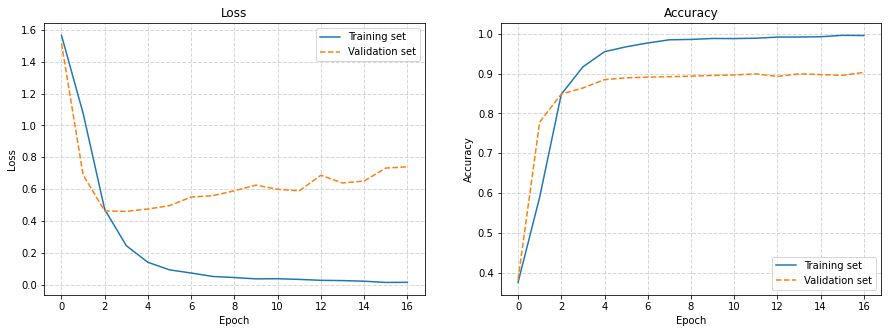

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()